<a href="https://colab.research.google.com/github/MurtazaG786/Machine_learning/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kashnitsky/mlcourse")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'mlcourse' dataset.
Path to dataset files: /kaggle/input/mlcourse


In [ ]:
import os

file_list = os.listdir(path)

print("Files in the dataset directory:")
for file_name in file_list:
    print(file_name)

Files in the dataset directory:
medium_posts.csv
weights_heights.csv
hostel_factors.csv
affairs.csv
accidental-deaths-in-usa-monthly.csv
adult.data.csv
samsung_train.txt
mlbootcamp5_train.csv
flight_delays_test.csv
websites_train_sessions.csv
microchip_tests.txt
samsung_test.txt
telecom_churn.csv
titanic_train.csv
video_games_sales.csv
winequality-white.csv
ads_hour.csv
beauty.csv
site_dic.pkl
websites_test_sessions.csv
currency.csv
flight_delays_train.csv
adult_train.csv
samsung_test_labels.txt
wiki_machine_learning.csv
ads.csv
samsung_train_labels.txt
titanic_test.csv
credit_scoring_sample.csv
adult_test.csv


In [ ]:
import numpy as np
import pandas as pd

excel_file_path = os.path.join(path, file_list[12]) # Changed index from 12 to 7 to load 'telecom_churn.csv'

df_1 = pd.read_csv(excel_file_path)

In [ ]:
df=df_1.copy()
display(df.head(5))

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.Churn.value_counts()

,count
Churn,
False,2850
True,483


In [ ]:
df.drop({'State','Account length','Area code'},axis="columns",inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   International plan      3333 non-null   object 
 1   Voice mail plan         3333 non-null   object 
 2   Number vmail messages   3333 non-null   int64  
 3   Total day minutes       3333 non-null   float64
 4   Total day calls         3333 non-null   int64  
 5   Total day charge        3333 non-null   float64
 6   Total eve minutes       3333 non-null   float64
 7   Total eve calls         3333 non-null   int64  
 8   Total eve charge        3333 non-null   float64
 9   Total night minutes     3333 non-null   float64
 10  Total night calls       3333 non-null   int64  
 11  Total night charge      3333 non-null   float64
 12  Total intl minutes      3333 non-null   float64
 13  Total intl calls        3333 non-null   int64  
 14  Total intl charge       3333 non-null   

In [ ]:
def find_zScore(df):
  m=np.mean(df)
  s=np.std(df)
  outlier=[]
  for x in df:
    z=(x-m)/s
    if(z > 3 or z < -3): # Corrected condition to find values more than 2 std dev away
      outlier.append(x)
  return outlier

In [ ]:
outlier=find_zScore(df['Total day minutes'])
print(outlier)

[350.8, 346.8, 12.5, 0.0, 0.0, 7.9, 345.3, 2.6, 7.8]


In [ ]:
outlier=find_zScore(df['Total eve calls'])
print(outlier)

[164, 168, 37, 12, 36, 0, 170]


In [ ]:
df = df[~df['Total day minutes'].isin(outlier)]

In [ ]:
df = df[~df['Total eve calls'].isin(outlier)]

In [ ]:
df.head(5)

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df['International plan']=df['International plan'].apply(lambda x:1 if x=='Yes' else 0)
df['Churn']=df['Churn'].astype(int)
df['Voice mail plan']=df['Voice mail plan'].apply(lambda x:1 if x=='Yes' else 0)

In [ ]:
X=df.drop('Churn',axis=1)
y=df["Churn"]

In [ ]:
y

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
3328,0
3329,0
3330,0
3331,0


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# pipeline for scalling but it does not quite help in improvement
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(
        class_weight='balanced',
        max_iter=1000
    ))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [61]:
from sklearn.linear_model import LogisticRegression
le=LogisticRegression(class_weight='balanced',
    max_iter=1000,
    solver='liblinear'
)

In [71]:
model=le.fit(X_train,y_train)

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    max_depth=8
)
model=rf.fit(X_train, y_train)

In [83]:
y_pred=model.predict(X_test)

In [81]:
model.score(X_test,y_test)

0.9458646616541353

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       565
           1       0.86      0.77      0.81       100

    accuracy                           0.95       665
   macro avg       0.91      0.87      0.89       665
weighted avg       0.94      0.95      0.94       665



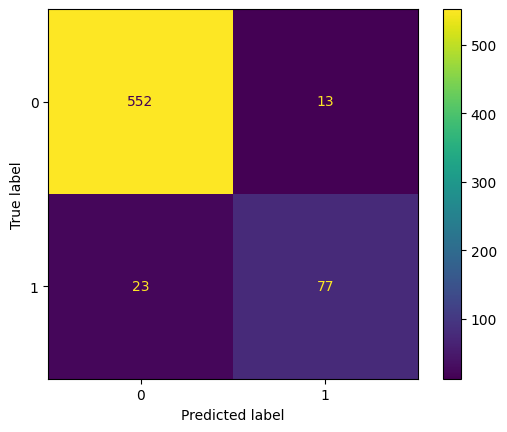

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Building a roc **curve**

In [89]:
train_auc = roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])
test_auc  = roc_auc_score(y_test,  rf.predict_proba(X_test)[:,1])
print(train_auc, test_auc)

0.9938396078068634 0.9266725663716814


In [90]:
from sklearn.model_selection import cross_val_score

cv_auc = cross_val_score(
    rf, X_train, y_train,
    scoring='roc_auc',
    cv=5
)

print(cv_auc)
print("Mean CV AUC:", cv_auc.mean())

[0.8775681  0.93256217 0.89123771 0.87449393 0.92192019]
Mean CV AUC: 0.8995564188812111


In [85]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [86]:
y_proba = model.predict_proba(X_test)[:, 1]

In [87]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

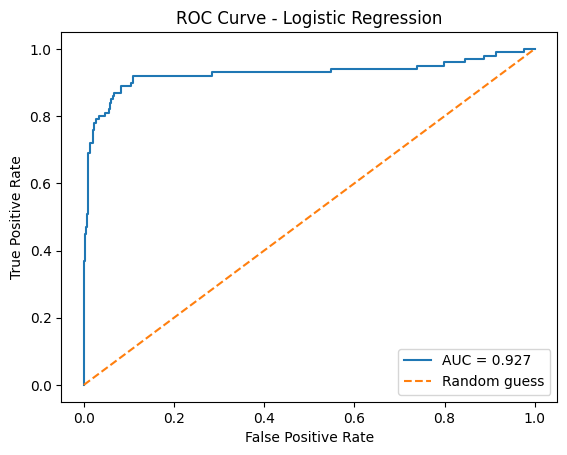

In [88]:
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()